In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from PIL import Image
from IPython.display import display

import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split

from get_frames import get_frames
from create_encoder_decoder_data import create_encoder_decoder_data

In [3]:
path_list = ['PuckerImages//RGB_cropped',
             'TwistImages//RGB']

path_list = ['PuckerImages//RGB_cropped',
             'TwistImages//RGB',
             'FoldImages//RGB',]

#path_list = ['PuckerImages//RGB_cropped']

test_size = 0.1

file_list = []
for path in path_list:
    file_list.extend([f for f in os.listdir(path) if os.path.isfile(f'{path}//{f}')])

#files for training and testing
train_list, test_list = train_test_split(file_list, test_size=test_size, random_state=42)
print(train_list)
print('\n')
print(test_list)

['Fold1.png', 'Twist17.png', 'Fold18.png', 'Twist20.png', 'Fold14.png', 'Twist26.png', 'Fold8.png', 'Twist21.png', 'Fold10.png', 'Twist14.png', 'Fold22.png', 'Pucker9.png', 'Pucker21.png', 'Twist25.png', 'Pucker5.png', 'Pucker4.png', 'Fold17.png', 'Pucker32.png', 'Twist27.png', 'Pucker30.png', 'Twist28.png', 'Twist7.png', 'Twist18.png', 'Pucker28.png', 'Twist16.png', 'Twist1.png', 'Pucker11.png', 'Twist32.png', 'Fold15.png', 'Pucker15.png', 'Fold4.png', 'Pucker13.png', 'Twist30.png', 'Pucker2.png', 'Pucker12.png', 'Pucker22.png', 'Pucker14.png', 'Twist8.png', 'Pucker20.png', 'Fold7.png', 'Pucker6.png', 'Twist12.png', 'Twist5.png', 'Fold11.png', 'Fold5.png', 'Twist23.png', 'Twist11.png', 'Twist13.png', 'Fold19.png', 'Pucker10.png', 'Fold2.png', 'Pucker8.png', 'Twist9.png', 'Twist6.png', 'Pucker18.png', 'Twist29.png', 'Fold13.png', 'Twist24.png', 'Twist4.png', 'Fold12.png', 'Twist15.png', 'Twist19.png', 'Fold6.png', 'Twist22.png', 'Pucker29.png', 'Pucker25.png', 'Twist2.png', 'Pucker27.p

In [4]:
#create dataset
stride_step = 50
angle_settings_list = [-6,6,3]
ifFlip=True
dtype = 'float64'
dtype = 'float16'
dtype = 'uint8'

norm_factor = 1

In [5]:
print('Creating training dataset')
file_list_input = train_list
frames_data_train = create_encoder_decoder_data(file_list_input, 
                                                path_list, 
                                                stride_step, 
                                                angle_settings_list, 
                                                ifFlip=ifFlip,
                                                dtype = dtype,
                                                norm_factor=norm_factor
                                               )
#shuffle
np.random.shuffle(frames_data_train)
print(f'\nTraining dataset shape: {frames_data_train.shape}')

if 1:
    #save data
    save_data = [train_list,frames_data_train]
    file_name = f'save_data//e_d_train_all_str_{stride_step}_ts_{test_size}_{dtype}_norm_{norm_factor}.pkl'
    with open(file_name, 'wb') as f:
        pickle.dump(save_data, f)

Creating training dataset
Fold1.png FoldImages//RGB
Twist17.png TwistImages//RGB
Fold18.png FoldImages//RGB
Twist20.png TwistImages//RGB
Fold14.png FoldImages//RGB
Twist26.png TwistImages//RGB
Fold8.png FoldImages//RGB
Twist21.png TwistImages//RGB
Fold10.png FoldImages//RGB
Twist14.png TwistImages//RGB
Fold22.png FoldImages//RGB
Pucker9.png PuckerImages//RGB_cropped
Pucker21.png PuckerImages//RGB_cropped
Twist25.png TwistImages//RGB
Pucker5.png PuckerImages//RGB_cropped
Pucker4.png PuckerImages//RGB_cropped
Fold17.png FoldImages//RGB
Pucker32.png PuckerImages//RGB_cropped
Twist27.png TwistImages//RGB
Pucker30.png PuckerImages//RGB_cropped
Twist28.png TwistImages//RGB
Twist7.png TwistImages//RGB
Twist18.png TwistImages//RGB
Pucker28.png PuckerImages//RGB_cropped
Twist16.png TwistImages//RGB
Twist1.png TwistImages//RGB
Pucker11.png PuckerImages//RGB_cropped
Twist32.png TwistImages//RGB
Fold15.png FoldImages//RGB
Pucker15.png PuckerImages//RGB_cropped
Fold4.png FoldImages//RGB
Pucker13.pn

NameError: name 'filename' is not defined

In [11]:
save_data=False

In [15]:
print('Creating test dataset')
file_list_input = test_list
frames_data_test = create_encoder_decoder_data(file_list_input, 
                                               path_list, 
                                               stride_step, 
                                               angle_settings_list, 
                                               ifFlip=ifFlip,
                                               dtype = dtype,
                                               norm_factor=norm_factor)
#shuffle
np.random.shuffle(frames_data_test)
print(f'\nTest dataset shape: {frames_data_test.shape}')

if 1:
    #save data
    save_data = [test_list,frames_data_test]
    file_name = f'save_data//e_d_test_all_str_{stride_step}_ts_{test_size}_{dtype}_norm_{norm_factor}.pkl'
    with open(file_name, 'wb') as f:
        pickle.dump(save_data, f)

Creating test dataset
Fold21.png FoldImages//RGB
Pucker3.png PuckerImages//RGB_cropped
Fold3.png FoldImages//RGB
Pucker23.png PuckerImages//RGB_cropped
Pucker16.png PuckerImages//RGB_cropped
Twist31.png TwistImages//RGB
Pucker7.png PuckerImages//RGB_cropped
Pucker26.png PuckerImages//RGB_cropped
Pucker24.png PuckerImages//RGB_cropped

Test dataset shape: (7200, 2048, 50, 3)


In [17]:
save_data=False

In [ ]:
#create dataset, separate for each defect
stride_step = 50
angle_settings_list = [-6,6,3]
ifFlip=True
dtype = 'float64'
dtype = 'float16'
dtype = 'uint8'

norm_factor = 1

path_list_list = [['PuckerImages//RGB_cropped'],
                  ['TwistImages//RGB'],
                  ['FoldImages//RGB']]

#path_list = ['PuckerImages//RGB_cropped']

test_size = 0.1

for path_list in path_list_list:
    print(f'\n\n{path_list}')
    file_list = []
    for path in path_list:
        file_list.extend([f for f in os.listdir(path) if os.path.isfile(f'{path}//{f}')])

    #files for training and testing
    train_list, test_list = train_test_split(file_list, test_size=test_size, random_state=42)
    print(f'Train list, {len(train_list)} cases:\n{train_list}')
    print('\n')
    print(f'Test list, {len(test_list)} cases:\n{test_list}')
    

    print('Creating training dataset')
    file_list_input = train_list
    frames_data_train = create_encoder_decoder_data(file_list_input, 
                                                    path_list, 
                                                    stride_step, 
                                                    angle_settings_list, 
                                                    ifFlip=ifFlip,
                                                    dtype = dtype,
                                                    norm_factor=norm_factor
                                                   )

    print(f'\nTraining dataset shape: {frames_data_train.shape}')

    if 1:
        #save data
        save_data = [train_list,frames_data_train]
        file_name = f'save_data//e_d_train_{path_list[0][:4]}_str_{stride_step}_ts_{test_size}_{dtype}_norm_{norm_factor}.pkl'
        with open(file_name, 'wb') as f:
            pickle.dump(save_data, f)
            
        save_data=False
        
        
        
    print('Creating test dataset')
    file_list_input = test_list
    frames_data_test = create_encoder_decoder_data(file_list_input, 
                                                   path_list, 
                                                   stride_step, 
                                                   angle_settings_list, 
                                                   ifFlip=ifFlip,
                                                   dtype = dtype,
                                                   norm_factor=1
                                                  )

    if 1:
        #save data
        save_data = [test_list,frames_data_test]
        file_name = f'save_data//e_d_test_{path_list[0][:4]}_str_{stride_step}_ts_{test_size}_{dtype}_norm_{norm_factor}.pkl'
        with open(file_name, 'wb') as f:
            pickle.dump(save_data, f)
            
        save_data=False



['PuckerImages//RGB_cropped']
Train list, 28 cases:
['Pucker20.png', 'Pucker4.png', 'Pucker21.png', 'Pucker13.png', 'Pucker16.png', 'Pucker3.png', 'Pucker24.png', 'Pucker28.png', 'Pucker32.png', 'Pucker2.png', 'Pucker9.png', 'Pucker1.png', 'Pucker25.png', 'Pucker17.png', 'Pucker18.png', 'Pucker22.png', 'Pucker27.png', 'Pucker8.png', 'Pucker23.png', 'Pucker26.png', 'Pucker30.png', 'Pucker19.png', 'Pucker11.png', 'Pucker7.png', 'Pucker31.png', 'Pucker5.png', 'Pucker15.png', 'Pucker6.png']


Test list, 4 cases:
['Pucker29.png', 'Pucker10.png', 'Pucker12.png', 'Pucker14.png']
Creating training dataset
Pucker20.png PuckerImages//RGB_cropped
Pucker4.png PuckerImages//RGB_cropped
Pucker21.png PuckerImages//RGB_cropped
Pucker13.png PuckerImages//RGB_cropped
Pucker16.png PuckerImages//RGB_cropped
Pucker3.png PuckerImages//RGB_cropped
Pucker24.png PuckerImages//RGB_cropped
Pucker28.png PuckerImages//RGB_cropped
Pucker32.png PuckerImages//RGB_cropped
Pucker2.png PuckerImages//RGB_cropped
Pucker

In [3]:
#load data
test_size = 0.1
stride_step = 50
norm_factor=1
dtype = 'uint8'


#load train data
with open(f'save_data//e_d_train_all_str_{stride_step}_ts_{test_size}_{dtype}_norm_{norm_factor}.pkl', 'rb') as f:
    train_list,frames_data_train = pickle.load(f)
#load test data
with open(f'save_data//e_d_test_all_str_{stride_step}_ts_{test_size}_{dtype}_norm_{norm_factor}.pkl', 'rb') as f:
    test_list,frames_data_test = pickle.load(f)
    
print(f'Training dataset shape: {frames_data_train.shape}')
print(f'Training dataset dtype: {frames_data_train.dtype}')
print('\n\n')
print(f'Test dataset shape: {frames_data_test.shape}')
print(f'Test dataset dtype: {frames_data_test.dtype}')

Training dataset shape: (61600, 2048, 50, 3)
Training dataset dtype: uint8



Test dataset shape: (7200, 2048, 50, 3)
Test dataset dtype: uint8


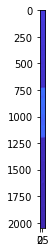

In [11]:
plt.imshow(frames_data_train[4000])

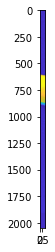

In [5]:
plt.imshow(frames_data_test[601])

In [4]:
#manual data collection
stride_step = 50

dtype = 'float64'
dtype = 'float16'
numb_decimals = False

if 0:
    angle_list = [-2.5, 0, 2.5, 5, 7.5]
else:
    angle_min = -3
    angle_max = 9
    angle_step = 3
    
    angle_min = -6
    angle_max = 6
    angle_step = 3

    angle_list = np.arange(angle_min, 1.1*angle_max, angle_step)
        
for file in test_list[:2]:
    #get path
    for path in path_list:
        index = 4
        if file[:index] == path[:index]:
            break
    print(file, path)

    #print(f'Opened file: {file}')
    img = Image.open(f'{path}//{file}')
    #transpose the original image
    img_flip = img.transpose(Image.FLIP_TOP_BOTTOM)
    #convert to array
    image_data_original = np.array(img, dtype=dtype)

    for i, angle in enumerate(angle_list):
        #rotate the image
        img_rotated = img.rotate(angle)
        angle_flip = angle*(-1)
        img_flip_rotated = img_flip.rotate(angle_flip)
        #convert to array
        image_rotated_data = np.array(img_rotated, dtype=dtype)
        image_flip_rotated_data = np.array(img_flip_rotated, dtype=dtype)
        #cutoff the end
        image_rotated_data = image_rotated_data[:,:-96,:]
        image_flip_rotated_data = image_flip_rotated_data[:,:-96,:]

        if 1:
            #fill black regions with background colour  
            #color used for replacement from top left corner
            r2,g2,b2 = image_data_original[0,0]    
            #create mask where pixels are black
            r1, g1, b1 = image_rotated_data[:,:,0], image_rotated_data[:,:,1], image_rotated_data[:,:,2]
            mask = (r1 == 0) & (g1 == 0) & (b1 == 0)
            #replace black pixels
            image_rotated_data[:,:,:3][mask] = [r2, g2, b2]

            #repeat for flipped image
            #create mask where pixels are black
            r1, g1, b1 = image_flip_rotated_data[:,:,0], image_flip_rotated_data[:,:,1], image_flip_rotated_data[:,:,2]
            mask = (r1 == 0) & (g1 == 0) & (b1 == 0)
            #replace black pixels
            image_flip_rotated_data[:,:,:3][mask] = [r2, g2, b2]

        image_rotated_data_frames = get_frames(image_rotated_data, stride_step, ifPrint = False)
        image_flip_rotated_data_frames = get_frames(image_flip_rotated_data, stride_step, ifPrint = False)
        
        #normalise
        image_rotated_data_frames = image_rotated_data_frames/255
        if numb_decimals:
            image_rotated_data_frames = np.around(image_rotated_data_frames, numb_decimals)
        image_flip_rotated_data_frames = image_flip_rotated_data_frames/255
        if numb_decimals:
            image_flip_rotated_data_frames = np.around(image_flip_rotated_data_frames, numb_decimals)
        
        if 'frames_data' in locals():
            frames_data = np.concatenate((frames_data,
                                          image_rotated_data_frames, 
                                          image_flip_rotated_data_frames), 
                                         axis=0)
        else:
            frames_data = np.concatenate((image_rotated_data_frames, 
                                          image_flip_rotated_data_frames), 
                                         axis=0)
            

Pucker7.png PuckerImages//RGB_cropped
Pucker23.png PuckerImages//RGB_cropped


In [5]:
save_data = frames_data
filename = f'save_data//{dtype}_around_{numb_decimals}'
with open(filename, 'wb') as f:
    pickle.dump(save_data, f)

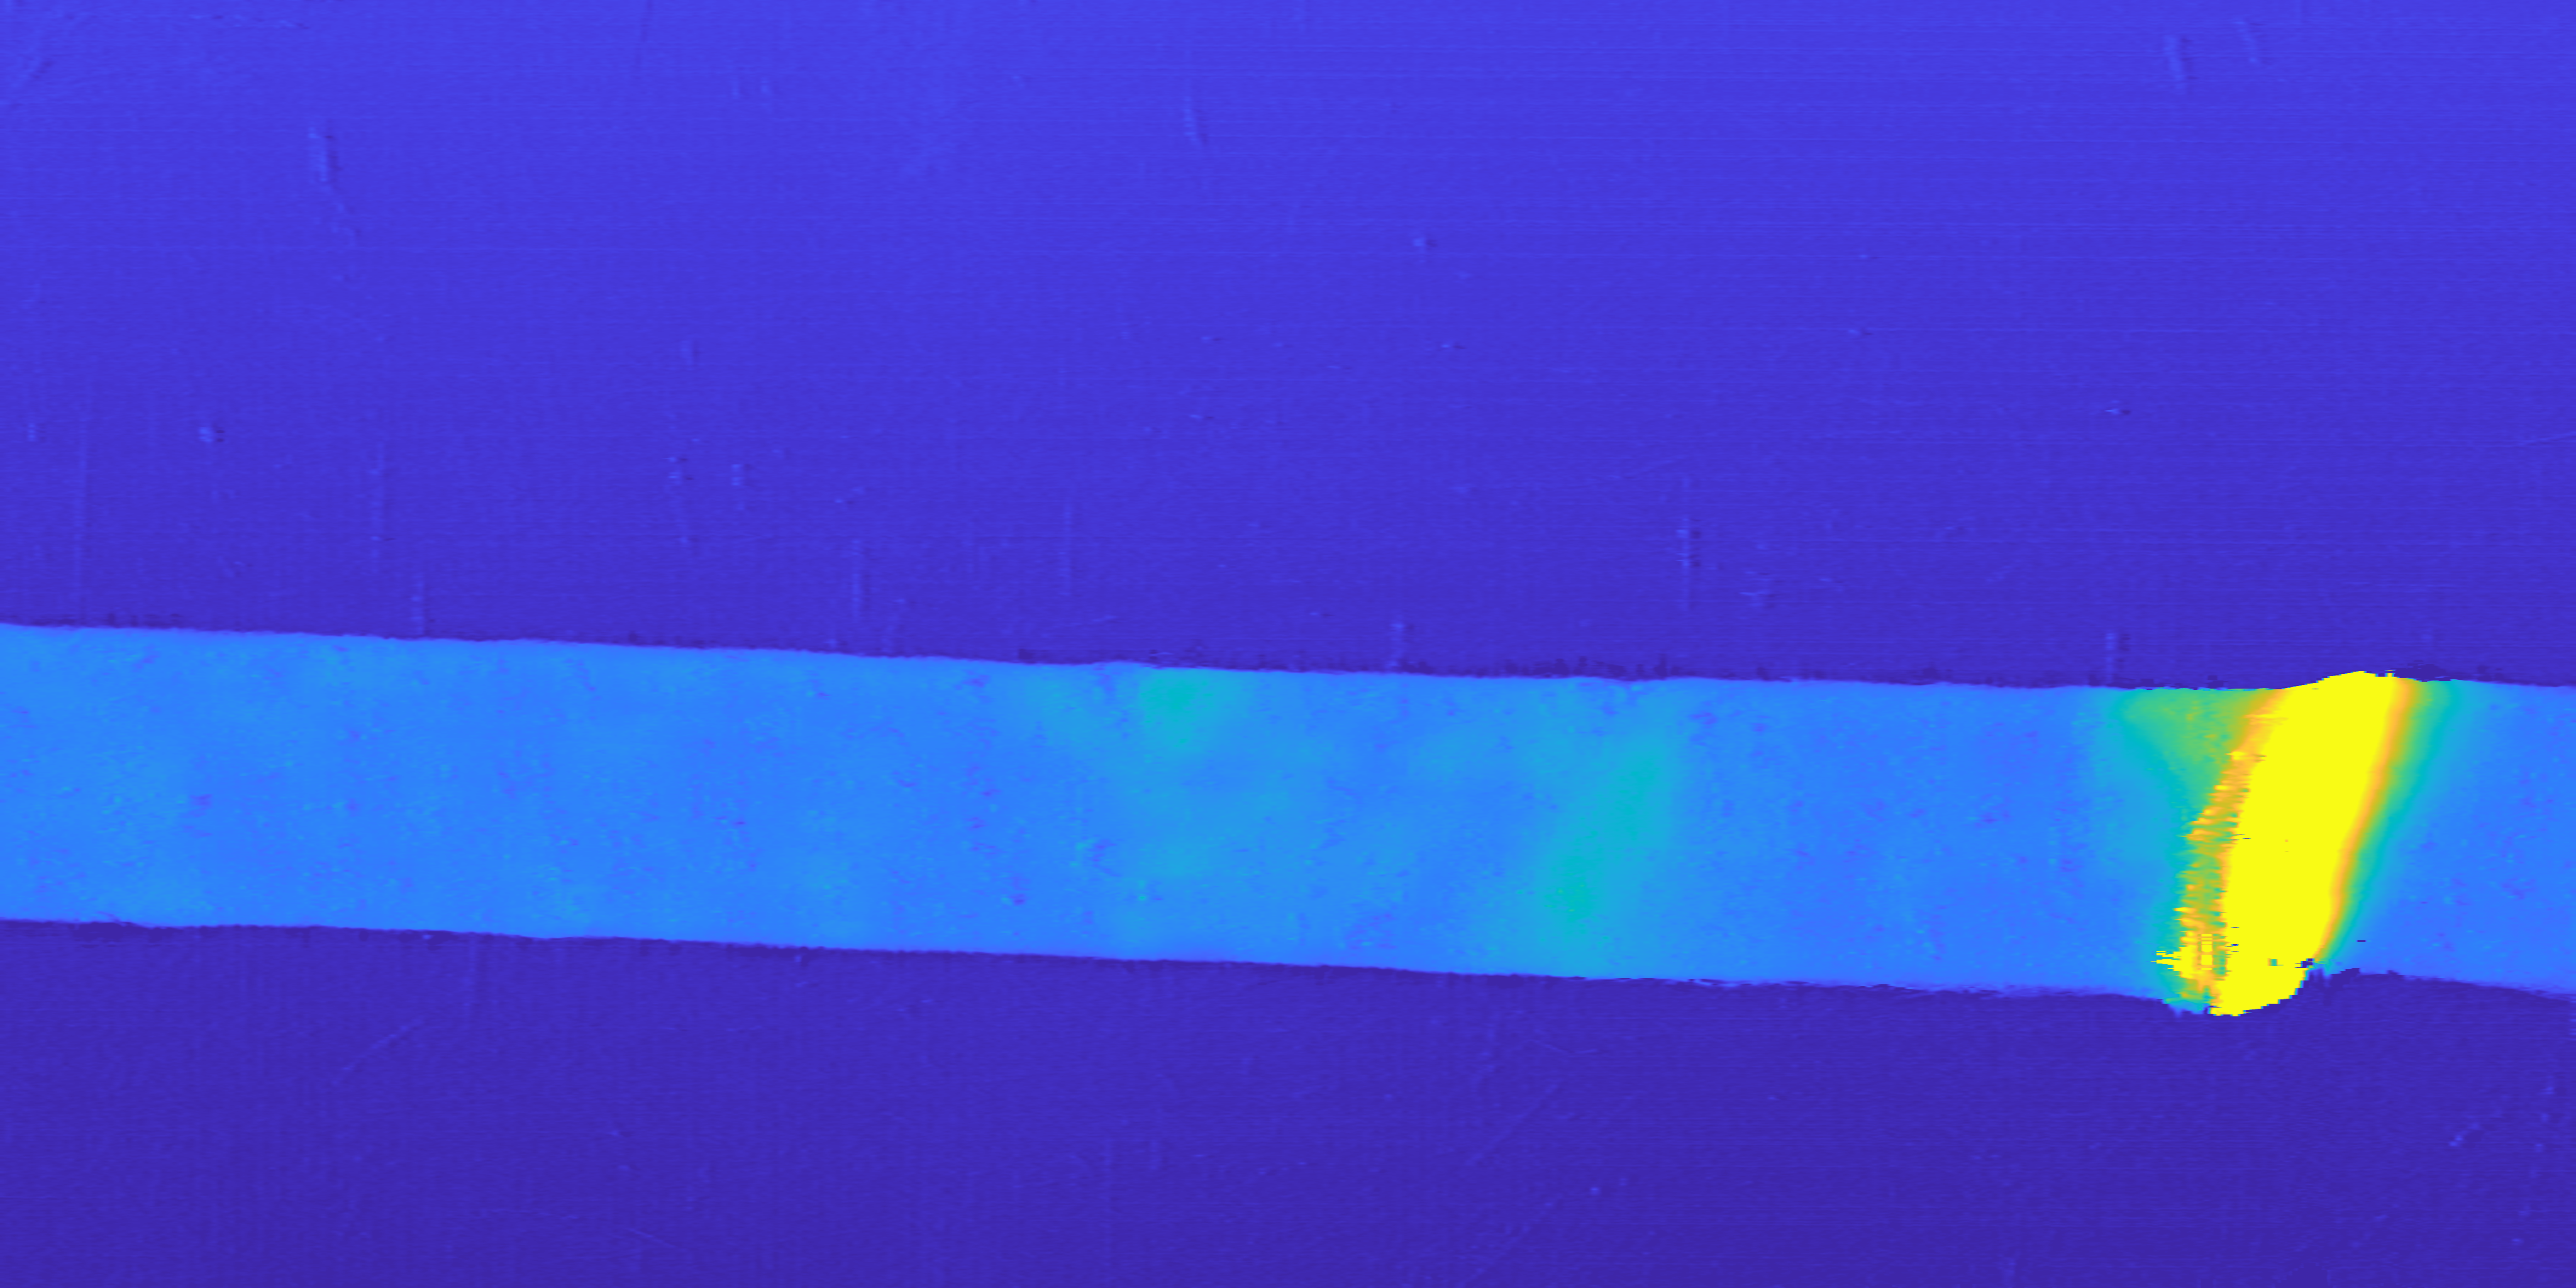

In [11]:
display(img)

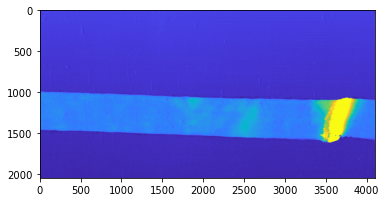

In [12]:
dtype = 'float64'
img_test_64 = np.array(img, dtype=dtype)
img_test_64 = img_test_64/255
plt.imshow(img_test_64)

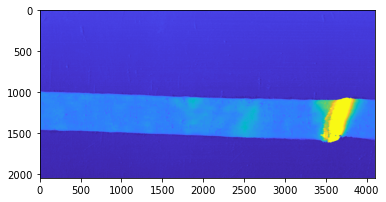

In [16]:
#round
numb_decimals = 2
dtype = 'float64'
img_test_64 = np.array(img, dtype=dtype)
img_test_64 = np.around(img_test_64/255,numb_decimals)
plt.imshow(img_test_64)

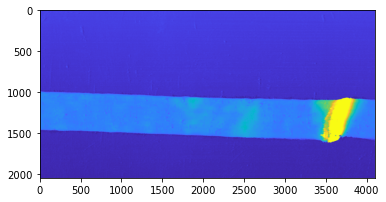

In [14]:
dtype = 'float16'
img_test_16 = np.array(img, dtype=dtype)
img_test_16 = img_test_16/255
plt.imshow(img_test_16.astype('float64'))